In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def F(x,mode):
    if mode=='lin':
        return x
    elif mode=='relu':
        x[x<0]=0
        return x


def sim_EI(M,tau,mode):

    #stability matrix
    stability_matrix=(M-np.eye(2))/tau.reshape(2,1)
    eig,eigvec=np.linalg.eig(stability_matrix)
    print('real part of lambda is {}'.format(np.mean(np.diag(stability_matrix))))
    print('real part of lambda is {}'.format(eig.real))

    
    
    #parameter
    v=np.array([0.0,0.0])
    gamma=np.array([-10,10])
    dt=0.1
    T=1000
    t=np.arange(0,T,dt)
    
    #simulation
    v_hist=[]
    for _ in range(int(T/dt)):
        v_hist.append(v)
        dvdt=(-v+F(np.dot(M,v) - gamma,mode) )/tau
        v=v+dvdt*dt
    v_hist=np.array(v_hist)
    
    
    #null
    vmax=np.max(v_hist,axis=0)
    vmin=np.min(v_hist,axis=0)
    
    ve_null_e=np.linspace(vmin[0]*1.1,vmax[0]*1.1,100)
    vi_null_e=(ve_null_e*(1-M[0,0])+gamma[0])/M[0,1]
    
    vi_null_i=np.linspace(vmin[1]*1.1,vmax[1]*1.1,100)
    ve_null_i=(vi_null_i*(1-M[1,1])+gamma[1])/M[1,0]
    
    
    #####plot
    plt.figure(figsize=[10,5])
    
    plt.subplot(1,2,1)
    plt.plot(t,v_hist[:,0],label='e')
    plt.plot(t,v_hist[:,1],label='i')
    plt.legend()
    plt.title('v history')
    plt.xlabel('time')
    plt.ylabel('activity')
    
    plt.subplot(1,2,2)
    #null
    plt.plot(ve_null_e,vi_null_e,label='dv_e/dt=0')
    plt.plot(ve_null_i,vi_null_i,label='dv_i/dt=0')
    plt.legend()
    plt.xlim([vmin[0]*1.1,vmax[0]*1.1])
    plt.ylim([vmin[1]*1.1,vmax[1]*1.1])
    #cycle
    plt.plot(v_hist[:,0],v_hist[:,1])
    plt.scatter(v_hist[0,0],v_hist[0,1],color='k')
    plt.title('phase plane')
    plt.xlabel('ve')
    plt.ylabel('vi')

real part of lambda is -0.00416666666667
real part of lambda is [-0.00416667 -0.00416667]


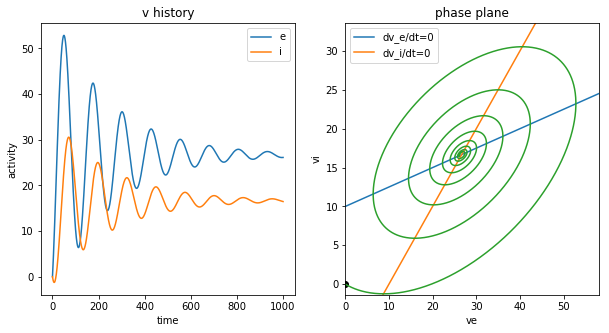

In [8]:
M=np.array([[1.25,-1],[1,0]])
tau=np.array([10,30])
v_hist=sim_EI(M,tau,mode='lin')

real part of lambda is 0.0025
real part of lambda is [ 0.0025  0.0025]


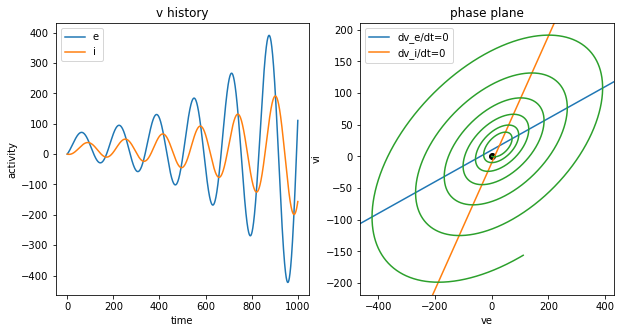

In [9]:
M=np.array([[1.25,-1],[1,0]])
tau=np.array([10,50])
v_hist=sim_EI(M,tau,mode='lin')

real part of lambda is 0.0
real part of lambda is [  8.67361738e-19   8.67361738e-19]


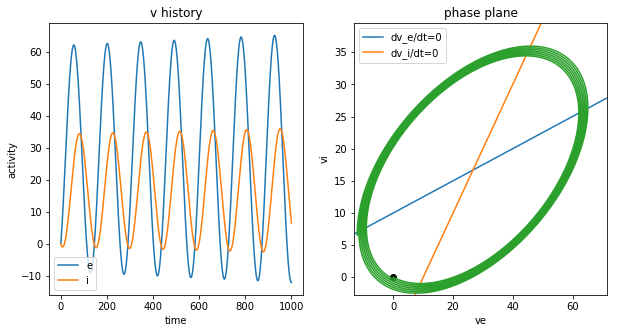

In [10]:
M=np.array([[1.25,-1],[1,0]])
tau=np.array([10,40])
v_hist=sim_EI(M,tau,mode='lin')

real part of lambda is 0.0025
real part of lambda is [ 0.0025  0.0025]


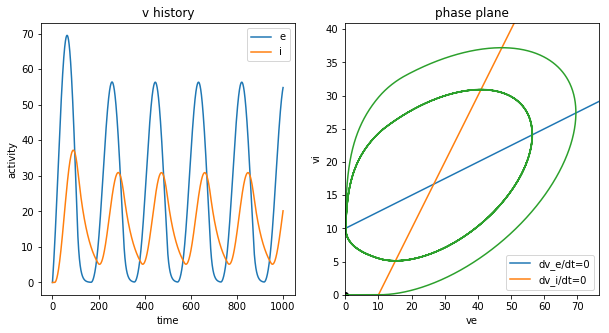

In [11]:
M=np.array([[1.25,-1],[1,0]])
tau=np.array([10,50])
v_hist=sim_EI(M,tau,mode='relu')